In [1]:
#Importing all library functions
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
#Importing data to a dataframe using pandas from csv file. CSV File downloaded from Kaggle
housingdata_df = pd.read_csv("HousingData.csv")

In [3]:
#Viewing the Data Frame
housingdata_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
housingdata_df.shape

(506, 14)

In [8]:
#Showing all rows where there is not even a single null value
housingdata_df.dropna(axis='index',how='any')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [9]:
#Shows total of non-null rows for each variable
housingdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
#To understand the attributes needed for multivariate linear regression, it is important to understand the 
#relationship between price and the attributes to decide what all attributes need to be considered for 
#making the prediction

In [63]:
#Creating a function for Scatterplot that can be used to find the relationship between the dependent variable price
#and the various independent variables. This function will be called to create scatterplots between 
#Price and other attributes
def scatterplotFunction(y_arg,scatterColor,y_label,title):
    price = housingdata_df['MEDV']
    plt.scatter(price, y_arg, color=scatterColor, edgecolor='black',linewidth=1,alpha=0.75)
    plt.xlabel('Price')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()   

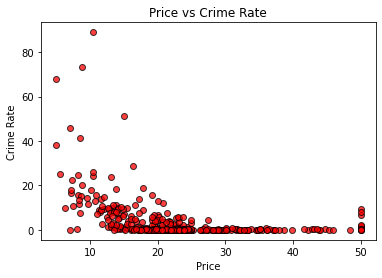

In [64]:
#Price versus Crime Rate. Price of house seems to increase with less crime rate. Calling the Scatterplot function.
crime = housingdata_df['CRIM']
scatterplotFunction(crime,'red','Crime Rate','Price vs Crime Rate')

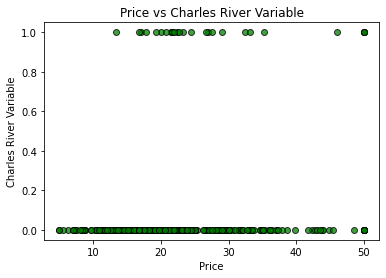

In [66]:
#Relationship between charles river variable and House price. There seems to be no particular pattern here.
#Calling the Scatterplot function.
charlsriver = housingdata_df['CHAS']
scatterplotFunction(charlsriver,'green','Charles River Variable','Price vs Charles River Variable')

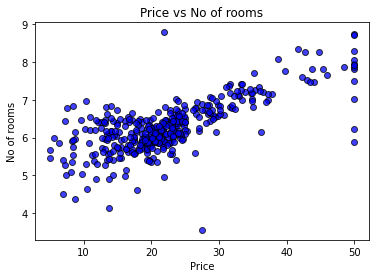

In [68]:
#Relationship between number of rooms in a house versus the price. Calling the Scatterplot function.
#There seems to be a general trend of price increasing with increse in the number of rooms. Linear relationship.
rooms = housingdata_df['RM']
scatterplotFunction(rooms,'blue','No of rooms','Price vs No of rooms')

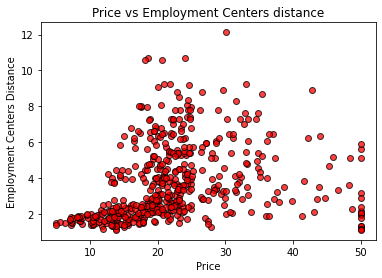

In [14]:
#Usually price of a home varies with respect to promixity with employment centers. Calling the Scatterplot function.
#Price of homes near employment centers tend to be high and viceversa. Here, no such pattern is observed.
distance = housingdata_df['DIS']
scatterplotFunction(distance,'red','Charles River Variable','Price vs Charles River Variable')

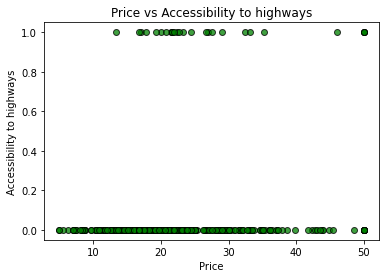

In [69]:
#Relationship between Price and accessibility to radial highways.Calling the Scatterplot function.
price = housingdata_df['MEDV']
highway_access = housingdata_df['RAD']
scatterplotFunction(charlsriver,'green','Accessibility to highways','Price vs Accessibility to highways')

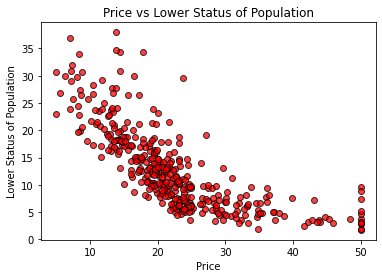

In [70]:
#Generally, home prices decrease when percentage of lower status of population is more in an area. 
#Calling the Scatterplot function.
#This graph is showing the exact trend.
lowerstatus = housingdata_df['LSTAT']
scatterplotFunction(lowerstatus,'red','Lower Status of Population','Price vs Lower Status of Population')

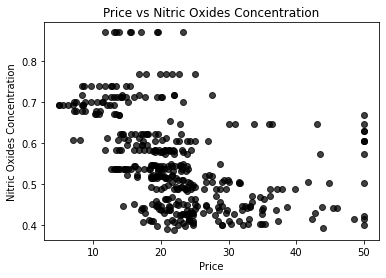

In [71]:
#Generally, home prices decrease with nitric oxides concentration. Calling the Scatterplot function.
#This graph is not showing that trend.
nitricoxides = housingdata_df['NOX']
scatterplotFunction(nitricoxides,'black','Nitric Oxides Concentration','Price vs Nitric Oxides Concentration')

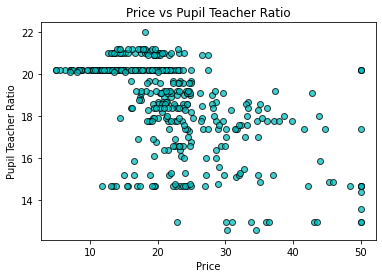

In [72]:
#Generally, home prices decrease when pupil-teacher ratio by town is more. Calling the Scatterplot function.
#This graph is not showing that trend.
ptratio = housingdata_df['PTRATIO']
scatterplotFunction(ptratio,'c','Pupil Teacher Ratio','Price vs Pupil Teacher Ratio')

In [73]:
#Replacing NA with NaN wherever applicable
housingdata_df.replace('NA',np.nan,inplace=True)

/Users/tan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [74]:
#Showing all rows without NaN.
housingdata_df = housingdata_df.dropna(how='any',axis=0)
housingdata_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [22]:
housingdata_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [75]:
#As per the exploratory data analysis performed above, the attributes CRIM, RM, DIS and LSTAT have been found to
#influence the home price , MEDV. These are the independent variables.
X = housingdata_df[['CRIM','RM','DIS','LSTAT']].values
X[0:5]

array([[6.3200e-03, 6.5750e+00, 4.0900e+00, 4.9800e+00],
       [2.7310e-02, 6.4210e+00, 4.9671e+00, 9.1400e+00],
       [2.7290e-02, 7.1850e+00, 4.9671e+00, 4.0300e+00],
       [3.2370e-02, 6.9980e+00, 6.0622e+00, 2.9400e+00],
       [2.9850e-02, 6.4300e+00, 6.0622e+00, 5.2100e+00]])

In [77]:
#Price is the dependent variable.
y = housingdata_df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [78]:
#The data has been split into training and testing sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [81]:
print(X_train.shape)
print(y_train.shape)

(295, 4)
(295,)


In [82]:
print(X_test.shape)
print(y_test.shape)

(99, 4)
(99,)


In [79]:
#Creating an object of Linear Regression class. Fitting the training set
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [83]:
#The coefficients are negative for variables where the dependent variable decreases with increase in these variables.
#Here, price decreases with increase in CRIM(crime rate), LSTAT(lower status population) 
#and DIS(distance from employment centers)
print(regr.coef_)

[-0.11788809  5.77567762 -0.41894423 -0.54639855]


In [86]:
# Explained variance score: 1 is perfect prediction
y_pred= regr.predict(X_test)
print("Residual sum of squares: %.2f"% np.mean((y_pred - y_test) ** 2))
print('Variance score: %.2f' % regr.score(x, y))


Residual sum of squares: 28.60
Variance score: 0.67
